<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Multiclass_Logistic_Regression_Iris_Decision_Boundary_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dataset bawaan: Iris (multiclass). Visualisasi pakai 2 fitur agar decision boundary 2D.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [2]:
#  Data & seed
seed = 123
print("Random seed:", seed)
iris = load_iris()

Random seed: 123


In [3]:
# Pilih 2 fitur yang informatif untuk plot (petal length, petal width)
feat_idx = [2, 3]
X = iris.data[:, feat_idx]
y = iris.target
feature_names = [iris.feature_names[i] for i in feat_idx]
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=seed, stratify=y
)

In [4]:
#  Pipeline & training (multinomial)
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000, multi_class="multinomial", solver="lbfgs"))
])
pipe.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(max_iter=2000, multi_class='multinomial'))])

In [5]:
#  Evaluasi
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1m = f1_score(y_test, y_pred, average="macro")
cm = confusion_matrix(y_test, y_pred)

In [6]:
print(f"Accuracy (test): {acc:.3f}")
print(f"Macro-F1 (test): {f1m:.3f}")
print("Classification report:\n", classification_report(y_test, y_pred, target_names=class_names, digits=3))

Accuracy (test): 0.978
Macro-F1 (test): 0.978
Classification report:
               precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        15
  versicolor      1.000     0.933     0.966        15
   virginica      0.938     1.000     0.968        15

    accuracy                          0.978        45
   macro avg      0.979     0.978     0.978        45
weighted avg      0.979     0.978     0.978        45



In [7]:
#  Grafik 1  Decision Boundary (2D)
# Buat grid pada ruang fitur asli (bukan scaled), prediksi lewat pipeline
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = pipe.predict(grid).reshape(xx.shape)

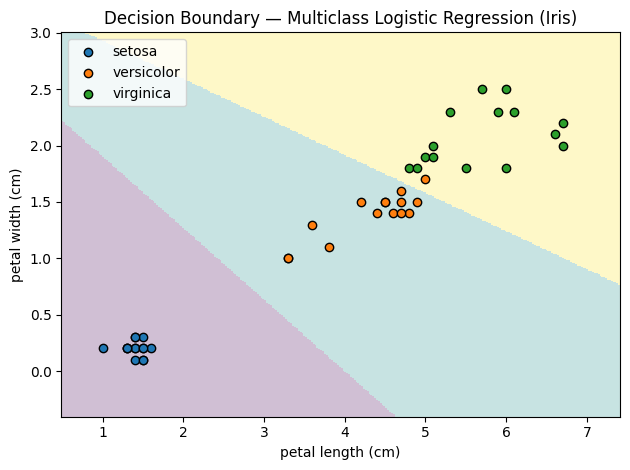

In [8]:
plt.figure()
plt.pcolormesh(xx, yy, Z, shading="auto", alpha=0.25)
# Titik uji
for cls, name in enumerate(class_names):
    idx = (y_test == cls)
    plt.scatter(X_test[idx, 0], X_test[idx, 1], label=name, edgecolor="k")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Decision Boundary - Multiclass Logistic Regression (Iris)")
plt.legend()
plt.tight_layout()
plt.show()

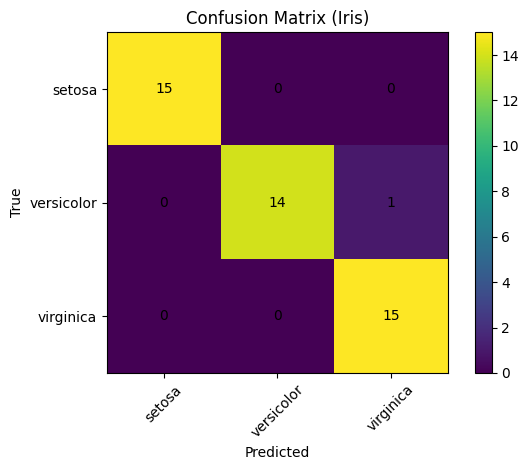

In [9]:
#  Grafik 2 - Confusion Matrix
plt.figure()
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix (Iris)")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
# Anotasi angka
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()